In [1]:
from os import makedirs, path
import numpy as np
import pandas as pd
from tqdm import tqdm
from gilg_utils.general import load_yaml, maxdisplay
from gilg_utils.models import LinearRegressor
import glob
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

In [2]:
input_df = pd.read_parquet('../Data/Processed/Regressionalize_train.parquet')

In [18]:
import gc
gc.collect()

0

In [ ]:
avg_unique = input_df.groupby([('Key','date_id')])['Data'].nunique().mean()
avg_values = input_df.groupby([('Key','date_id')])['Data'].mean()
avg_diff = input_df.groupby([('Key','date_id')]).apply(lambda df: df['Data'].diff().mean())

unique_df = avg_unique.reset_index()[['Column',0]].rename({'Column':'Feature',0:'Nunique'},axis=1)

spearman_df = pd.DataFrame()
feature_names = []
spearman_rs = []
for c in avg_values['Data'].columns:
    feature_names.append(c)
    s = spearmanr(avg_values[('Data',c)],avg_diff[c]).statistic
    spearman_rs.append(s)
spearman_df['Feature'] = feature_names
spearman_df['Value_Diff_Spearman'] = spearman_rs

lag_df = pd.DataFrame()
for lag in [1]:
    feature_names = []
    lag_spearman = []
    for c in input_df['Data'].columns:
        feature_names.append(c)
        lag_spearman.append(spearmanr(input_df[('Data',c)].iloc[lag:],input_df[('Data',c)].iloc[:-lag] ).statistic)
    lag_df['Feature'] = feature_names
    lag_df[f'Autocorrelation_lag_{lag}'] = lag_spearman
    
for lag in [1,2,3]:
    feature_names = []
    lag_spearman = []
    for c in input_df['Data'].columns:
        feature_names.append(c)
        lag_spearman.append(spearmanr(input_df[('Data',c)].diff().iloc[1+lag:],input_df[('Data',c)].diff().iloc[1:-lag]).statistic)
    lag_df['Feature'] = feature_names
    lag_df[f'Autocorrelation_diff_lag_{lag}'] = lag_spearman

out_df = unique_df.merge(spearman_df,on='Feature').merge(lag_df,on='Feature')

In [23]:
w = input_df[('Data','feature_74')].diff().iloc[4:]
x = input_df[('Data','feature_74')].diff().iloc[3:-1]
y = input_df[('Data','feature_74')].diff().iloc[2:-2]
z = input_df[('Data','feature_74')].diff().iloc[1:-3]

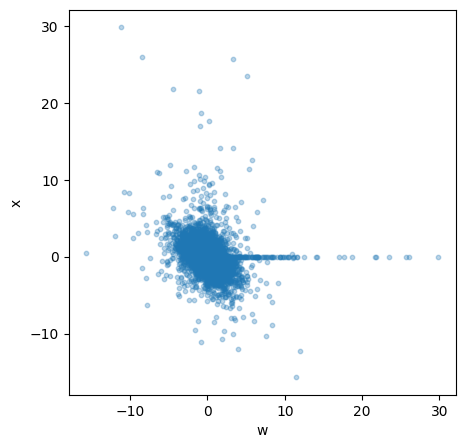

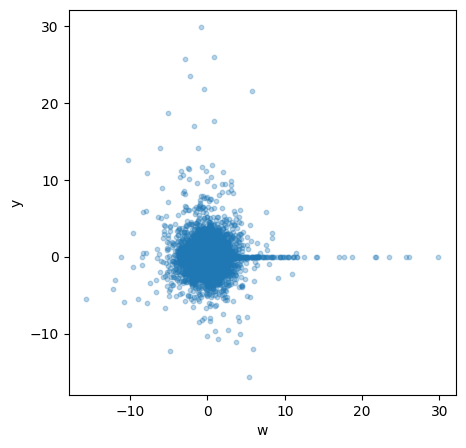

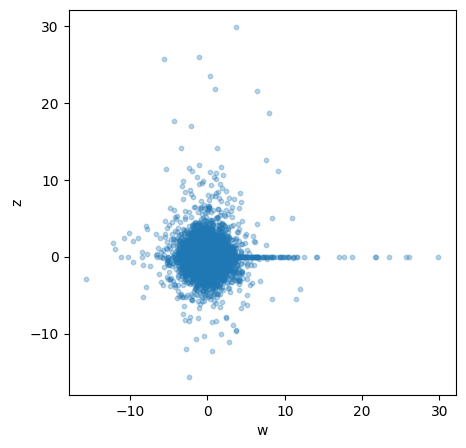

In [25]:
plt.figure(figsize=(5,5))
plt.scatter(w.values,x.values,s=10,alpha=0.3)
plt.xlabel('w')
plt.ylabel('x')
plt.show()
plt.figure(figsize=(5,5))
plt.scatter(w.values,y.values,s=10,alpha=0.3)
plt.xlabel('w')
plt.ylabel('y')
plt.show()
plt.figure(figsize=(5,5))
plt.scatter(w.values,z.values,s=10,alpha=0.3)
plt.xlabel('w')
plt.ylabel('z')
plt.show()

In [17]:
for lag in [1,2,3]:
    print(lag)
    for c in input_df['Data'].columns[:1]:
        display(input_df[('Data',c)].diff().iloc[1+lag:])
        display(input_df[('Data',c)].diff().iloc[1:-lag])

1


2         0.041592
3        -0.236076
4         0.063315
5         0.063326
6         0.053848
            ...   
999995    0.278581
999996   -0.631547
999997    0.162244
999998    0.130409
999999   -0.024063
Name: (Data, feature_00), Length: 999998, dtype: float32

1        -0.034789
2         0.041592
3        -0.236076
4         0.063315
5         0.063326
            ...   
999994    0.711972
999995    0.278581
999996   -0.631547
999997    0.162244
999998    0.130409
Name: (Data, feature_00), Length: 999998, dtype: float32

2


3        -0.236076
4         0.063315
5         0.063326
6         0.053848
7         0.132207
            ...   
999995    0.278581
999996   -0.631547
999997    0.162244
999998    0.130409
999999   -0.024063
Name: (Data, feature_00), Length: 999997, dtype: float32

1        -0.034789
2         0.041592
3        -0.236076
4         0.063315
5         0.063326
            ...   
999993    0.182193
999994    0.711972
999995    0.278581
999996   -0.631547
999997    0.162244
Name: (Data, feature_00), Length: 999997, dtype: float32

3


4         0.063315
5         0.063326
6         0.053848
7         0.132207
8        -0.427560
            ...   
999995    0.278581
999996   -0.631547
999997    0.162244
999998    0.130409
999999   -0.024063
Name: (Data, feature_00), Length: 999996, dtype: float32

1        -0.034789
2         0.041592
3        -0.236076
4         0.063315
5         0.063326
            ...   
999992   -0.891342
999993    0.182193
999994    0.711972
999995    0.278581
999996   -0.631547
Name: (Data, feature_00), Length: 999996, dtype: float32

In [72]:
display(out_df)

,Feature,Nunique,Spearman,Autocorrelation_lag_1,Autocorrelation_diff_lag_1,Autocorrelation_diff_lag_2,Autocorrelation_diff_lag_3
0,feature_00,5881.105882,0.050685,0.832005,-0.481891,-0.000361,0.000278
1,feature_01,5882.035294,0.226614,0.895425,-0.470616,0.006434,0.004127
2,feature_02,5881.094118,-0.097846,0.830679,-0.481719,0.000610,-0.000935
3,feature_03,5881.211765,-0.017253,0.830932,-0.482023,0.001215,-0.001067
4,feature_04,5882.094118,-0.485924,0.843830,-0.243219,-0.004289,-0.021466
...,...,...,...,...,...,...,...
74,feature_74,5817.141176,-0.010521,0.868820,-0.440145,0.000835,0.002581
75,feature_75,5881.188235,-0.075870,0.595132,-0.180015,-0.038082,-0.039913
76,feature_76,5881.400000,-0.032619,0.744620,-0.178628,-0.038858,-0.039511
77,feature_77,5881.305882,0.062228,0.758388,-0.371305,0.015786,0.002962


Nunique


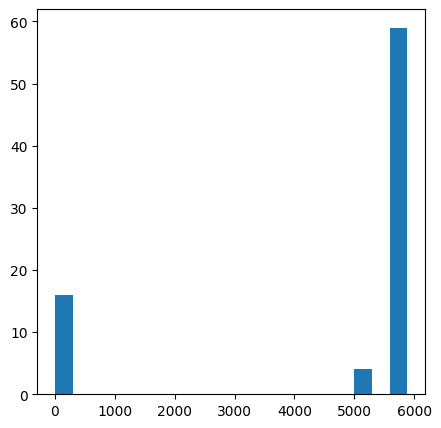

Value_Diff_Spearman


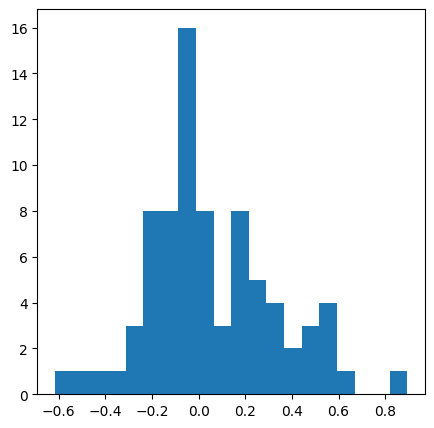

Autocorrelation_lag_1


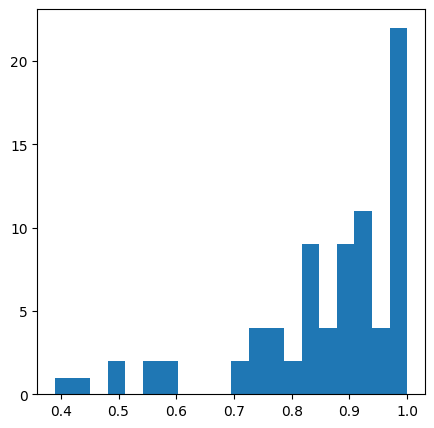

Autocorrelation_diff_lag_1


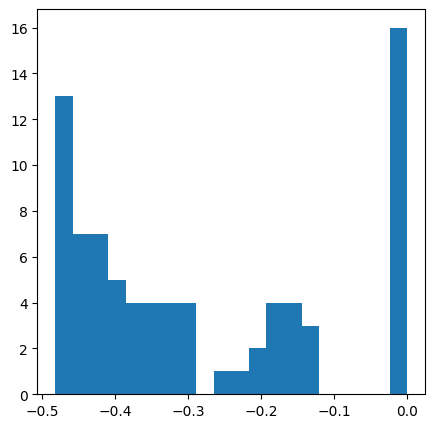

Autocorrelation_diff_lag_2


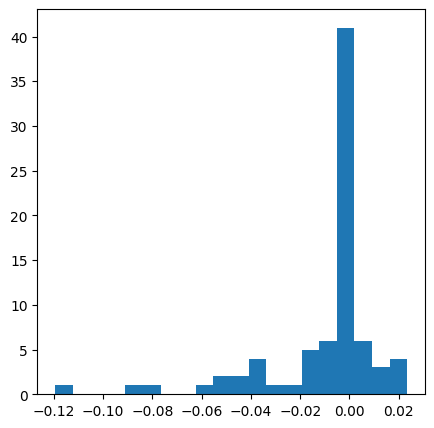

Autocorrelation_diff_lag_3


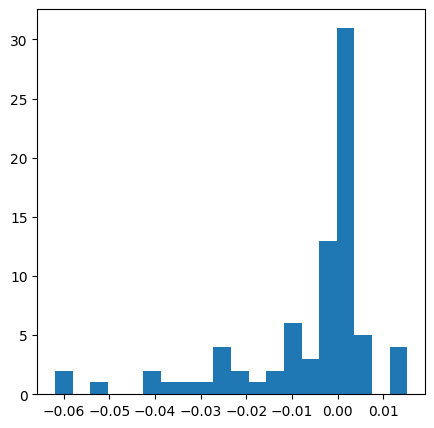

In [11]:
for c in out_df.columns[1:]:
    print(c)
    plt.figure(figsize=(5,5))
    plt.hist(out_df[c],bins=20)
    plt.show()

In [29]:
feature_filter = (out_df['Nunique']<(len(out_df)/2))
log_transform_filter = (out_df['Value_Diff_Spearman'].abs()>0.4)
no_diff = (out_df['Autocorrelation_lag_1'].abs()<0.65)
one_diff = (~no_diff) & (out_df['Autocorrelation_diff_lag_1'].abs()<0.3)
two_diff = (~no_diff) & (~one_diff) & (out_df['Autocorrelation_diff_lag_2'].abs()<0.3)

In [30]:
out_df['Filtered'] = feature_filter
out_df['Log_Transform'] = log_transform_filter
out_df['Diffs'] = 0
out_df.loc[one_diff,'Diffs'] = 1
out_df.loc[two_diff,'Diffs'] = 2

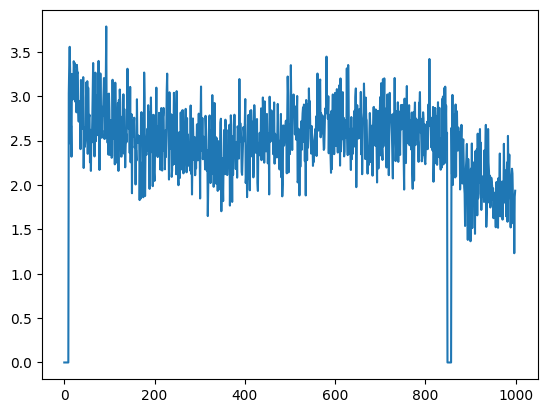

In [38]:
plt.plot(input_df[('Data','feature_32')].values[:1000])
plt.show()

In [41]:
display(input_df[~input_df[('Key','time_id')].isin([0,1])])

Category     Key                        Meta       Data                        \
Column   date_id time_id symbol_id    weight feature_00 feature_01 feature_02   
2            553       2         0  2.793216   3.697410  -0.448754   3.279827   
3            553       3         0  2.793216   3.461334  -0.521957   3.531130   
4            553       4         0  2.793216   3.524649  -0.812735   3.926784   
5            553       5         0  2.793216   3.587976  -0.839458   3.246552   
6            553       6         0  2.793216   3.641824  -1.010052   3.727892   
...          ...     ...       ...       ...        ...        ...        ...   
999995       587     770         9  1.712252   1.798011   0.206924   1.259401   
999996       587     771         9  1.712252   1.166464  -0.136084   1.389308   
999997       587     772         9  1.712252   1.328708  -0.106580   1.001753   
999998       587     773         9  1.712252   1.459116  -0.538167   1.333143   
999999       587     774         9  1.712252   1.435054  -0.294025   1.367201   

Category                                   ...        Meta              \
Column   feature_03 feature_04 feature_05  ... responder_0 responder_1   
2          3.096467  -3.242682   1.975476  ...   -4.233324   -5.000000   
3          3.476676  -2.547946   1.946134  ...   -5.000000   -5.000000   
4          3.293004  -3.426188   1.926407  ...   -4.065010   -5.000000   
5          3.280641  -3.101109   1.947921  ...   -5.000000   -5.000000   
6          3.204635  -3.186517   1.352936  ...   -5.000000   -3.612811   
...             ...        ...        ...  ...         ...         ...   
999995     0.935522  -1.167945  -0.118685  ...   -0.285225   -0.013986   
999996     1.029580  -1.247605  -0.101286  ...   -0.253267   -0.022391   
999997     1.325691  -0.967544  -0.037656  ...   -0.365716   -0.013766   
999998     1.033507  -0.420466  -0.121538  ...   -0.276060   -0.016701   
999999     1.649950  -0.824040  -0.089708  ...   -0.297720   -0.023016   

Category                                                       Label  \
Column   responder_2 responder_3 responder_4 responder_5 responder_6   
2           0.366184    0.176720    3.955946    1.376796    2.760634   
3          -1.148490   -0.245923    5.000000    2.731536    5.000000   
4          -1.649521    1.014326    4.729440    1.980281    4.328809   
5          -3.060081    1.438566    4.411820    0.960371    5.000000   
6          -5.000000    0.535853    3.675440   -0.337824    4.997816   
...              ...         ...         ...         ...         ...   
999995      0.026048   -0.267475    0.198077   -0.092646   -0.217365   
999996      0.291170   -0.348435    0.141977    0.183281   -0.378071   
999997      0.147631   -0.316002    0.133675    0.114434   -0.492267   
999998      0.370958   -0.487275    0.235108    0.067547   -0.564153   
999999      0.281105   -0.346220    0.219561    0.024004   -0.193860   

Category        Meta                   
Column   responder_7 responder_8 Fold  
2           5.000000    4.672639    1  
3           5.000000    4.379580    1  
4           5.000000    5.000000    1  
5           5.000000    3.089330    1  
6           5.000000    5.000000    1  
...              ...         ...  ...  
999995      0.757761   -0.167334    2  
999996      0.714751    0.076178    2  
999997      0.861782   -0.009171    2  
999998      0.691031   -0.073048    2  
999999      0.703579   -0.229307    2  

[997650 rows x 93 columns]

In [32]:
display(out_df[out_df['Log_Transform']])

,Feature,Nunique,Value_Diff_Spearman,Autocorrelation_lag_1,Autocorrelation_diff_lag_1,Autocorrelation_diff_lag_2,Autocorrelation_diff_lag_3,Filtered,Log_Transform,Diffs
4,feature_04,5882.094118,-0.485924,0.843830,-2.432191e-01,-4.288770e-03,-2.146628e-02,False,True,1
8,feature_08,5881.664706,0.625984,0.986206,-4.184423e-01,-2.078533e-03,1.168781e-03,False,True,2
10,feature_10,4.717647,0.544868,0.999991,0.000000e+00,0.000000e+00,0.000000e+00,True,True,1
11,feature_11,4.717647,0.544868,0.999992,-6.666720e-07,-6.666727e-07,-6.666733e-07,True,True,1
19,feature_19,5881.941176,0.542441,0.913443,-4.786341e-01,1.479785e-03,-2.652045e-03,False,True,2
28,feature_28,6.911765,0.457812,0.999950,-8.732582e-07,-8.732591e-07,-8.732600e-07,True,True,1
29,feature_29,6.911765,-0.615574,0.999883,-1.364466e-08,-1.364467e-08,-1.364469e-08,True,True,1
32,feature_32,5816.976471,0.895177,0.915043,-4.794659e-01,2.958016e-04,1.080736e-03,False,True,2
37,feature_37,5882.029412,0.560963,0.986977,-4.162047e-01,1.799338e-03,-1.664424e-03,False,True,2
38,feature_38,5881.947059,0.446142,0.986365,-4.182688e-01,-8.023588e-04,4.206595e-04,False,True,2


In [33]:
display(out_df)

,Feature,Nunique,Value_Diff_Spearman,Autocorrelation_lag_1,Autocorrelation_diff_lag_1,Autocorrelation_diff_lag_2,Autocorrelation_diff_lag_3,Filtered,Log_Transform,Diffs
0,feature_00,5881.105882,0.050685,0.832005,-0.481891,-0.000361,0.000278,False,False,2
1,feature_01,5882.035294,0.226614,0.895425,-0.470616,0.006434,0.004127,False,False,2
2,feature_02,5881.094118,-0.097846,0.830679,-0.481719,0.000610,-0.000935,False,False,2
3,feature_03,5881.211765,-0.017253,0.830932,-0.482023,0.001215,-0.001067,False,False,2
4,feature_04,5882.094118,-0.485924,0.843830,-0.243219,-0.004289,-0.021466,False,True,1
...,...,...,...,...,...,...,...,...,...,...
74,feature_74,5817.141176,-0.010521,0.868820,-0.440145,0.000835,0.002581,False,False,2
75,feature_75,5881.188235,-0.075870,0.595132,-0.180015,-0.038082,-0.039913,False,False,0
76,feature_76,5881.400000,-0.032619,0.744620,-0.178628,-0.038858,-0.039511,False,False,1
77,feature_77,5881.305882,0.062228,0.758388,-0.371305,0.015786,0.002962,False,False,2


In [3]:
from gilg_utils.jane_processors import feature_properties

In [4]:
out_df = feature_properties(input_df)
display(out_df)

/home/brady/gilg_utilities/gilg_utils/jane_processors.py:20: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  s = spearmanr(avg_values[('Data',c)],avg_diff[c]).statistic


,Feature,Nunique,Value_Diff_Spearman,Autocorrelation_lag_1,Autocorrelation_diff_lag_1,Autocorrelation_diff_lag_2,Autocorrelation_diff_lag_3
0,feature_00,5881.105882,0.050685,0.832005,-0.481891,-0.000361,0.000278
1,feature_01,5882.035294,0.226614,0.895425,-0.470616,0.006434,0.004127
2,feature_02,5881.094118,-0.097846,0.830679,-0.481719,0.000610,-0.000935
3,feature_03,5881.211765,-0.017253,0.830932,-0.482023,0.001215,-0.001067
4,feature_04,5882.094118,-0.485924,0.843830,-0.243219,-0.004289,-0.021466
...,...,...,...,...,...,...,...
74,feature_74,5817.141176,-0.010521,0.868820,-0.440145,0.000835,0.002581
75,feature_75,5881.188235,-0.075870,0.595132,-0.180015,-0.038082,-0.039913
76,feature_76,5881.400000,-0.032619,0.744620,-0.178628,-0.038858,-0.039511
77,feature_77,5881.305882,0.062228,0.758388,-0.371305,0.015786,0.002962


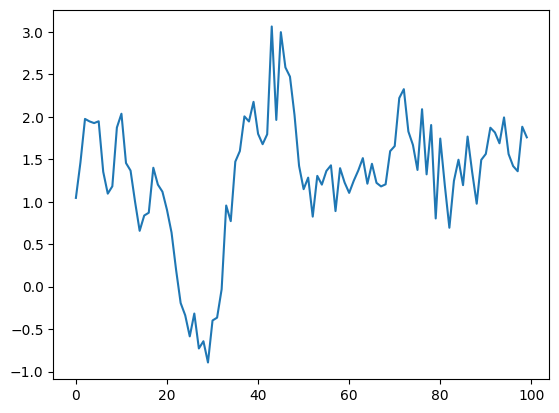

In [50]:
plt.plot(input_df[('Data','feature_05')].head(100).values)

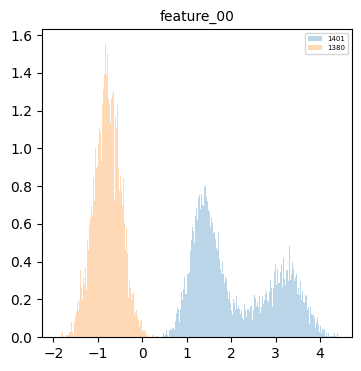

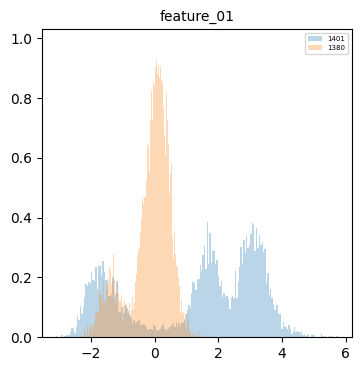

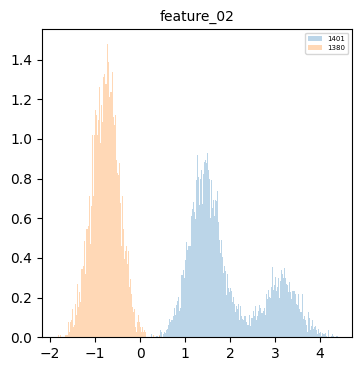

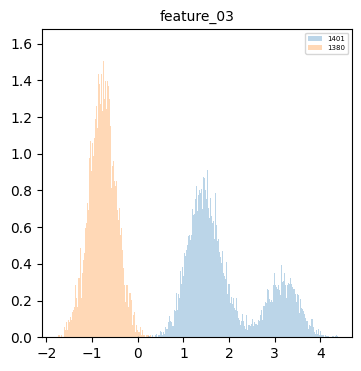

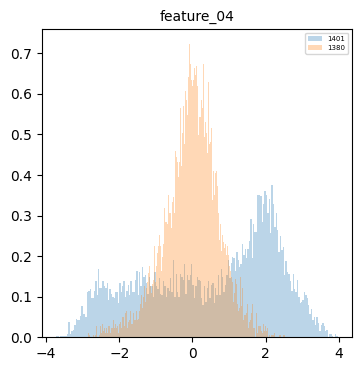

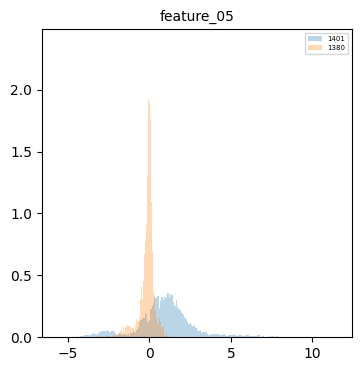

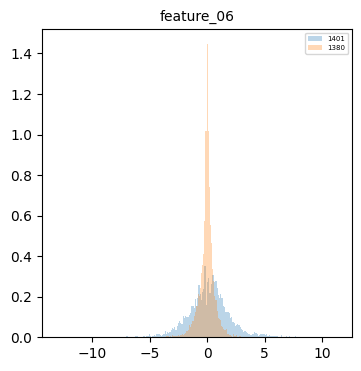

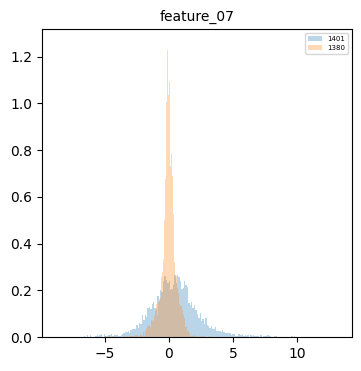

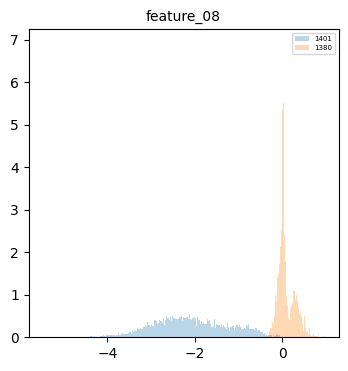

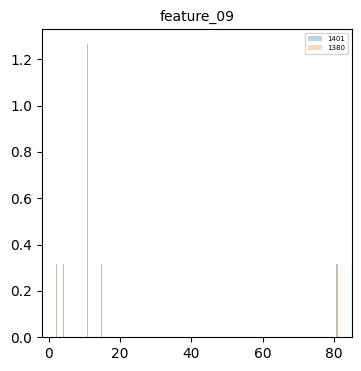

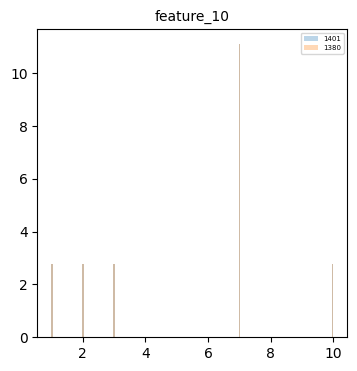

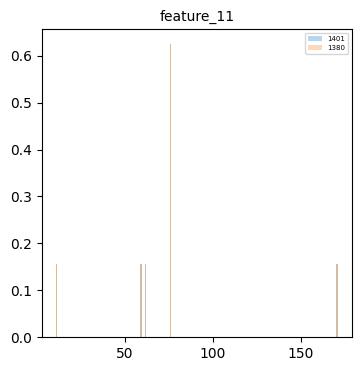

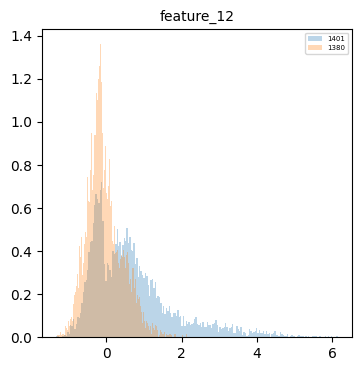

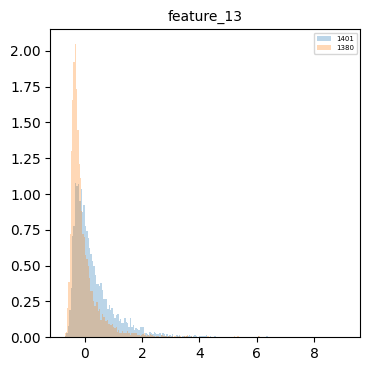

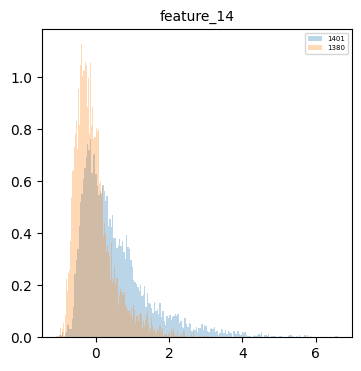

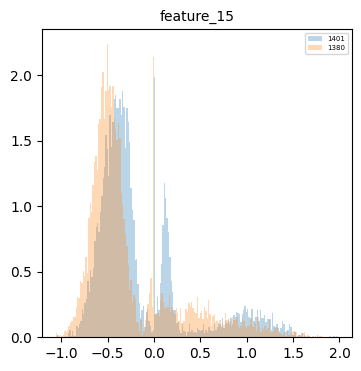

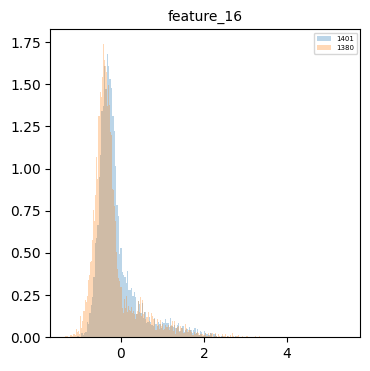

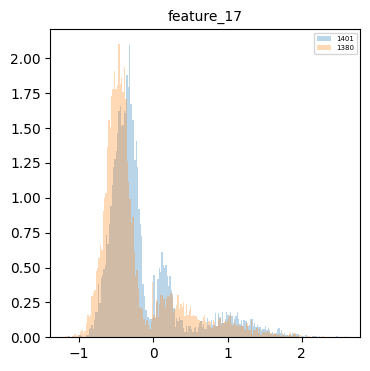

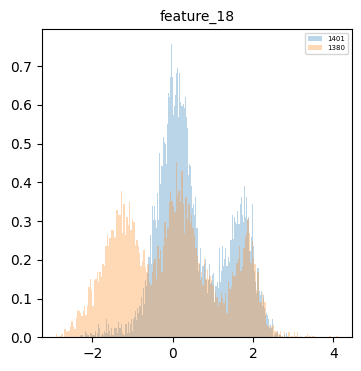

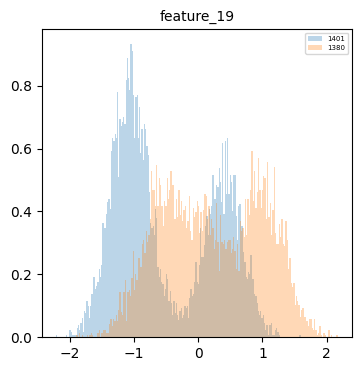

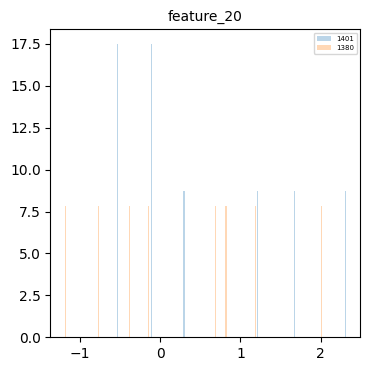

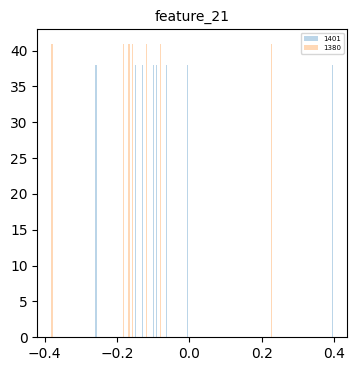

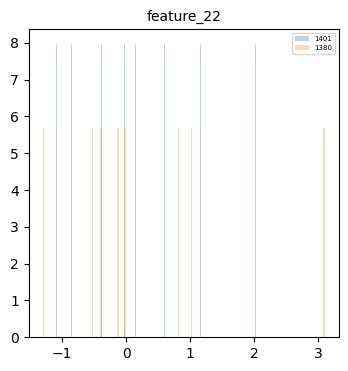

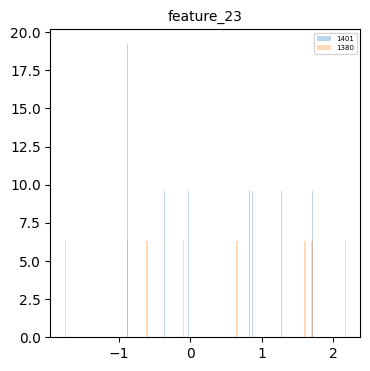

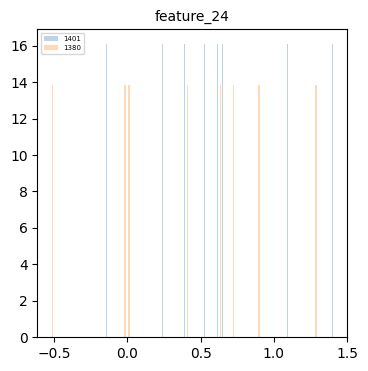

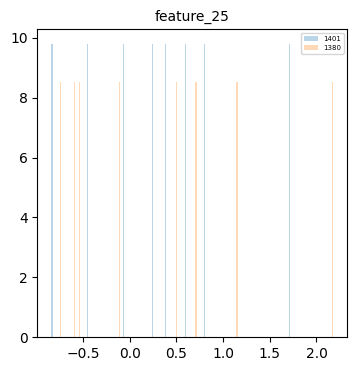

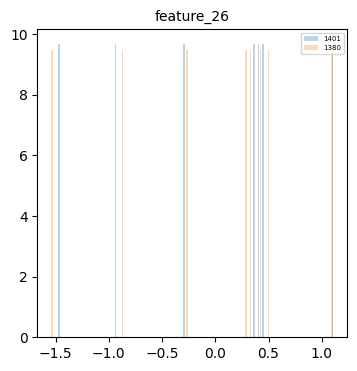

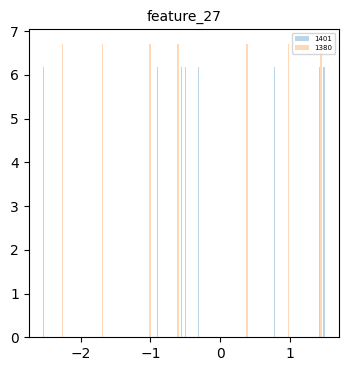

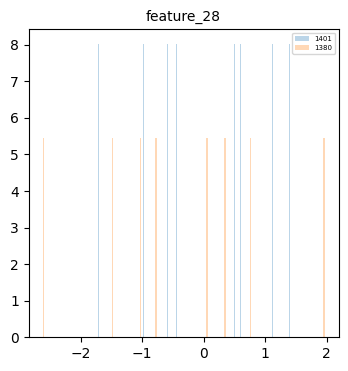

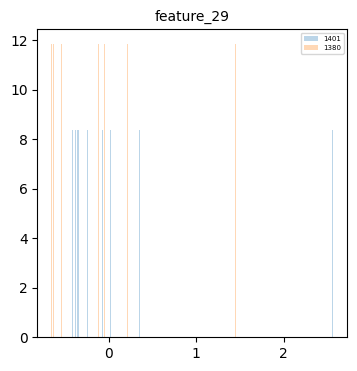

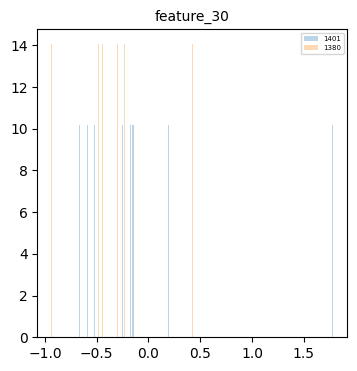

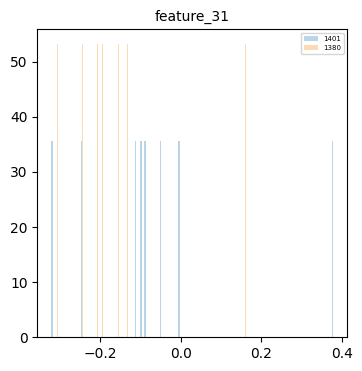

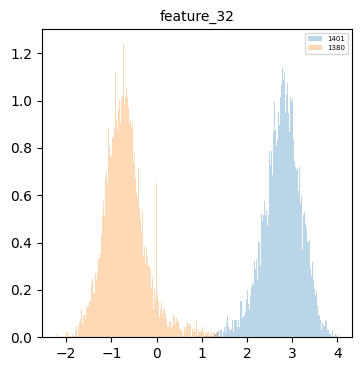

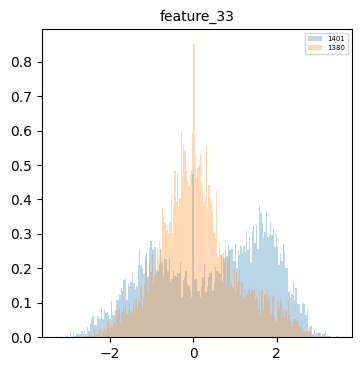

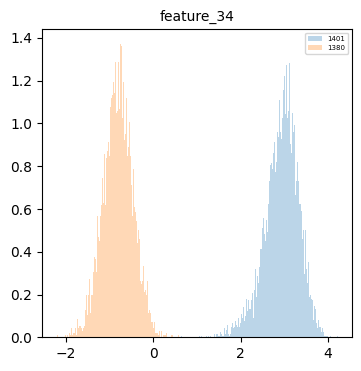

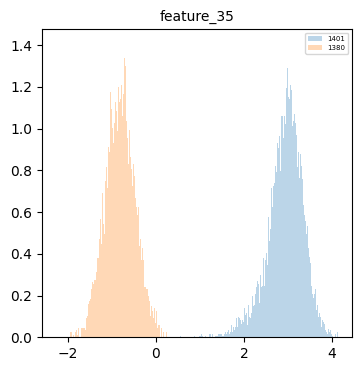

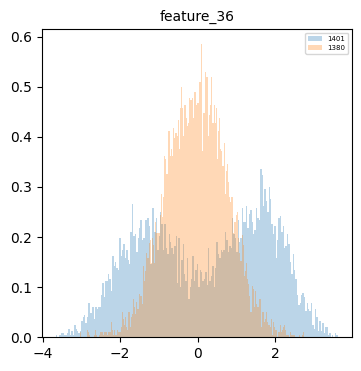

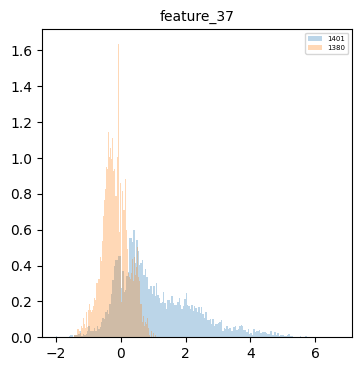

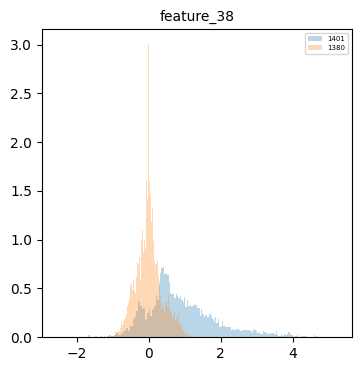

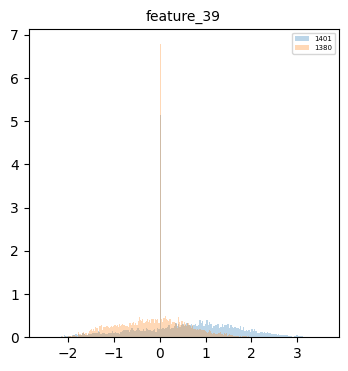

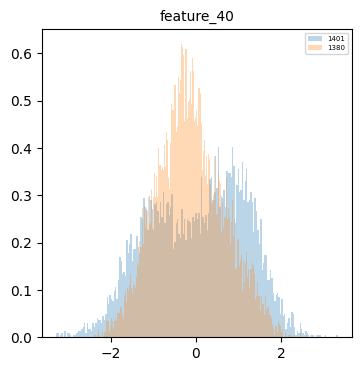

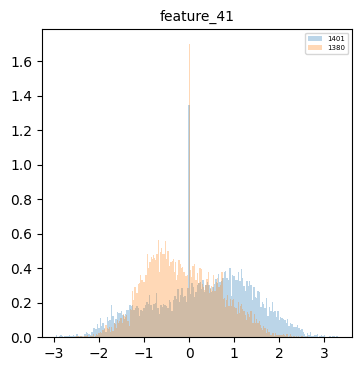

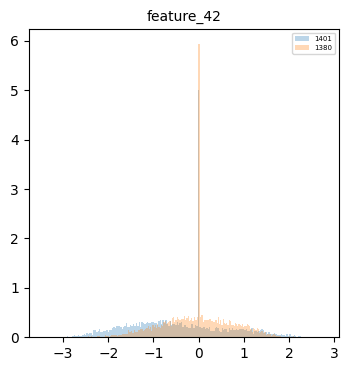

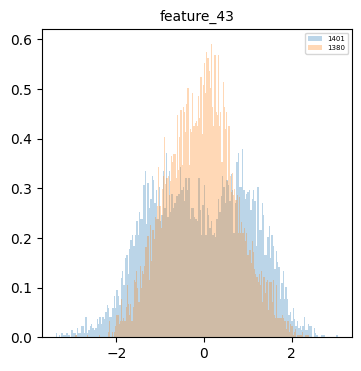

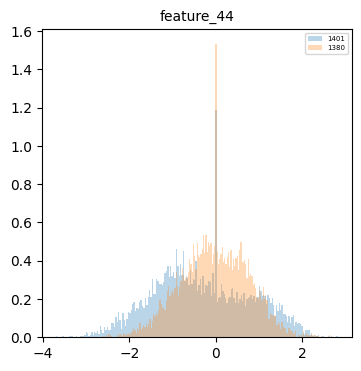

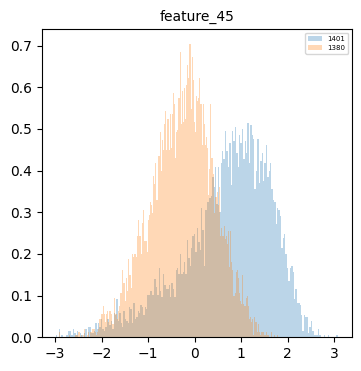

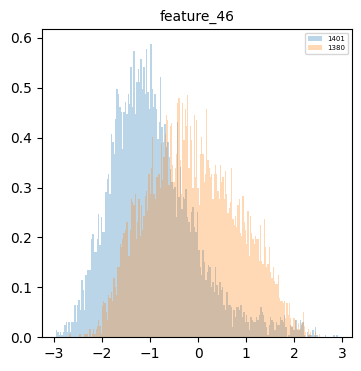

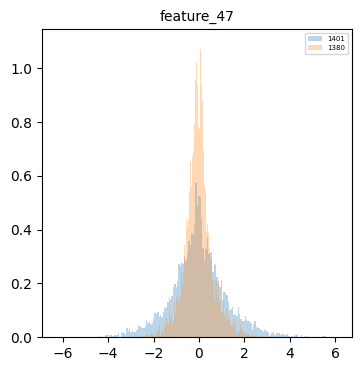

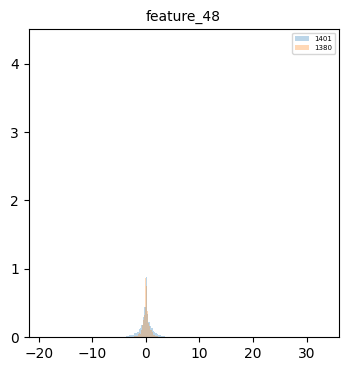

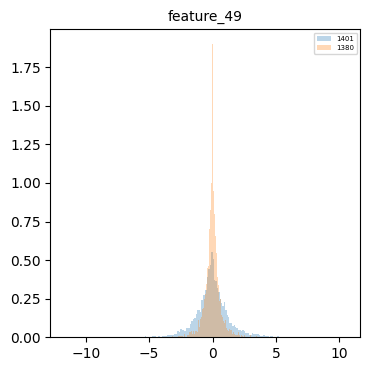

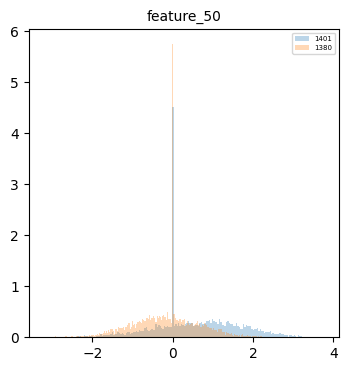

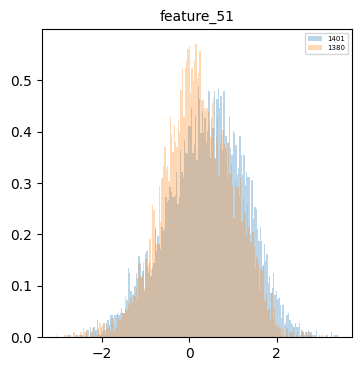

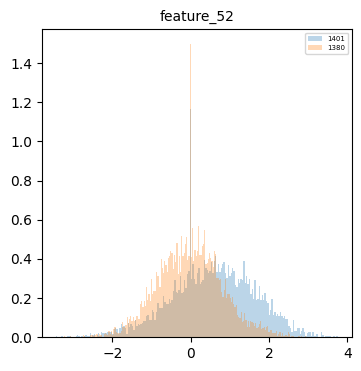

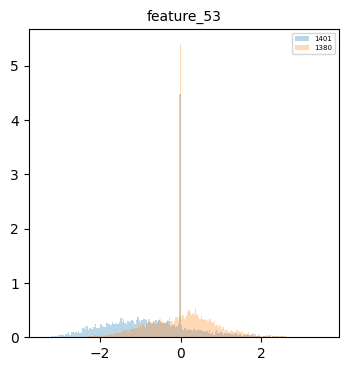

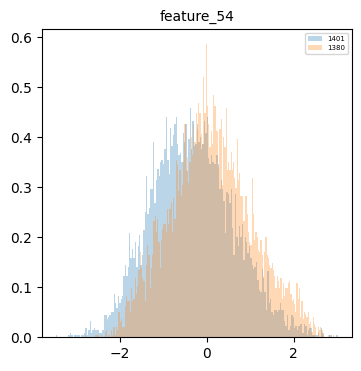

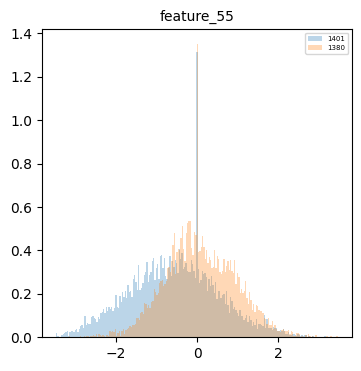

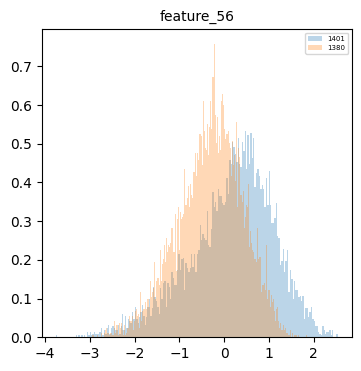

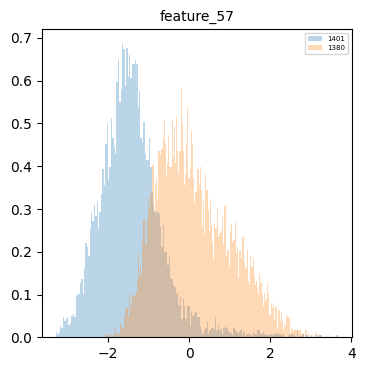

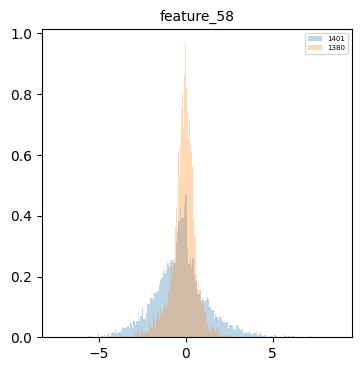

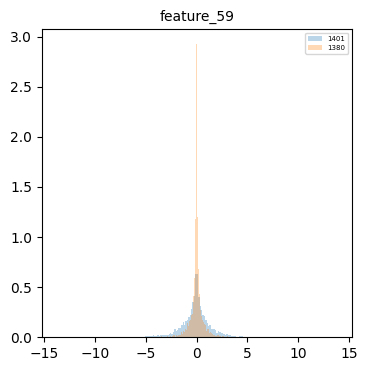

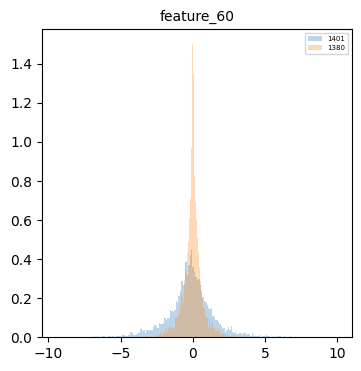

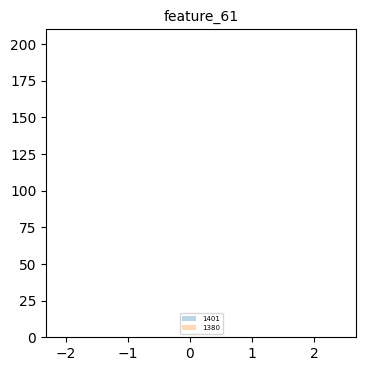

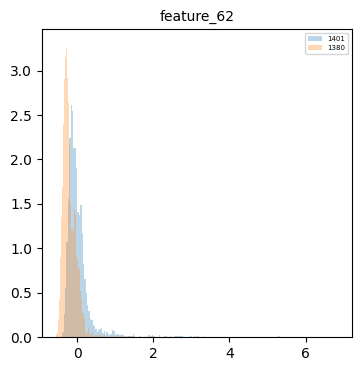

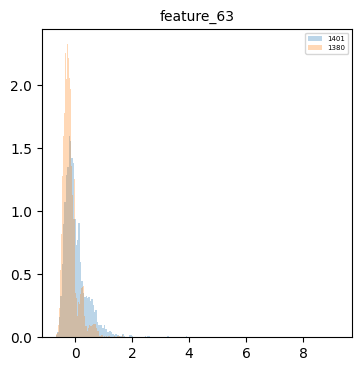

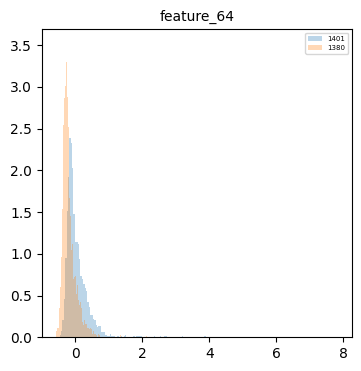

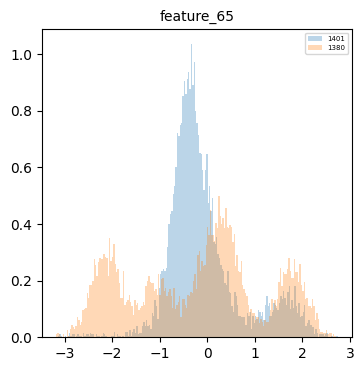

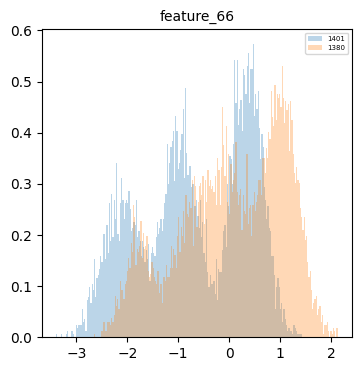

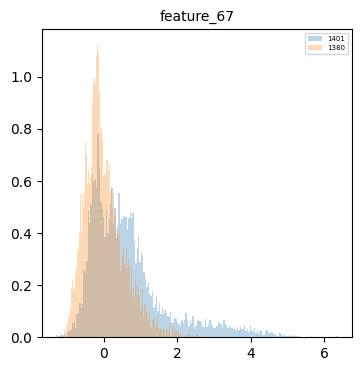

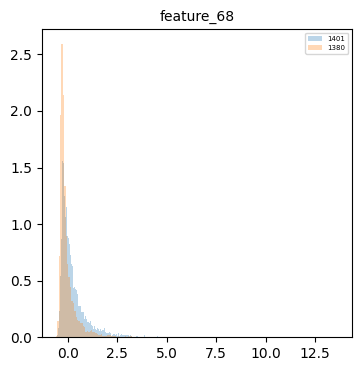

Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x7f9e5b2f63b0>>
Traceback (most recent call last):
  File "/home/brady/anaconda3/envs/jane_env/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 

KeyboardInterrupt



In [10]:
df_1401 = input_df[input_df[('Key','date_id')]==553]
df_1380 = input_df[input_df[('Key','date_id')]==573]
for c in input_df['Data'].columns:
    plt.figure(figsize=(4,4))
    plt.hist(df_1401[('Data',c)],bins=200,alpha=0.3,label='1401',density=True)
    plt.hist(df_1380[('Data',c)],bins=200,alpha=0.3,label='1380',density=True)
    plt.title(c,fontsize=10)
    plt.legend(fontsize=5)
    plt.show()